In [ ]:
!pip install ultralytics
from ultralytics import YOLO
from google.colab import files
import os
from pathlib import Path
import subprocess
DATA_ROOT_ABS = "/content/dataset"
SYNTHDATA_DIR_ABS = f"{DATA_ROOT_ABS}/kaggle/working/synthdata"
DATA_YAML_PATH = f"{SYNTHDATA_DIR_ABS}/data.yaml"
print("--- A. FILE UPLOAD ---")
print("Please select the 'ml.zip' file to upload.")
uploaded = files.upload()
if 'ml.zip' not in uploaded:
    print("\n CRITICAL ERROR: 'ml.zip' was not uploaded. Please re-run the cell and upload the correct file.")    raise FileNotFoundError("ml.zip not found after upload.")

print("File ml.zip successfully uploaded to /content/.")
print("\n--- B. DATA EXTRACTION AND ORGANIZATION ---")j
!rm -rf /content/dataset
!rm -rf /content/temp_unzip
print("Extracting ml.zip...")
!unzip -q /content/ml.zip -d /content/temp_unzip/
try:
    result = subprocess.run(['find', '/content/temp_unzip', '-type', 'd', '-name', 'synthdata'],
                            capture_output=True, text=True, check=True)
    ACTUAL_SYNTHDATA_PATH = result.stdout.strip().split('\n')[0]
    if not ACTUAL_SYNTHDATA_PATH:
        raise FileNotFoundError("Find command returned no path.")
except subprocess.CalledProcessError:
    print("\n CRITICAL ERROR: Could not find a folder named 'synthdata' inside the zip contents.")
    print("Please check the contents of your ml.zip file.")
    raise
except FileNotFoundError:
    print("\nCRITICAL ERROR: The zip file was extracted, but no 'synthdata' folder was found inside.")
    print("Please check the contents of your ml.zip file.")
    raise

print(f"Found 'synthdata' at: {ACTUAL_SYNTHDATA_PATH}")
print(f"Creating final destination directory: {SYNTHDATA_DIR_ABS}")
os.makedirs(SYNTHDATA_DIR_ABS, exist_ok=True)
print(f"Moving contents from {ACTUAL_SYNTHDATA_PATH} to {SYNTHDATA_DIR_ABS}")
!mv {ACTUAL_SYNTHDATA_PATH}/* {SYNTHDATA_DIR_ABS}/
print("\nFinal Directory Check (Should show 'images' and 'labels'):")
!ls {SYNTHDATA_DIR_ABS}
print("\n--- C. CREATE data.yaml ---")
with open(DATA_YAML_PATH, 'w') as f:
    f.write(f"""# YOLOv8 Dataset Configuration File
path: {DATA_ROOT_ABS}/kaggle/working/synthdata/
train: images/train
val: images/val
nc: 3
names: ['object_A', 'object_B', 'object_C']
""")

print(f"data.yaml created at: {DATA_YAML_PATH}")
print("\n Setup complete. Starting YOLO training...")
# results = model.train(data=DATA_YAML_PATH, epochs=50, imgsz=640)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.5 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
--- A. FILE UPLOAD ---
Please select the 'ml.zip' file to upload.


Saving ml.zip to ml.zip
File ml.zip successfully uploaded to /content/.

--- B. DATA EXTRACTION AND ORGANIZATION ---
Extracting ml.zip...
Found 'synthdata' at: /content/temp_unzip/kaggle/working/synthdata
Creating final destination directory: /content/dataset/kaggle/working/synthdata
Moving contents from /content/temp_unzip/kaggle/working/synthdata to /content/dataset/kaggle/working/synthdata

Final Directory Check (Should show 'images' and 'labels'):
data.yaml  images  labels

--- C. CREATE data.yaml ---
data.yaml created at: /content/dataset/kaggle/working/synthdata/data.yaml

✅ Setup complete. Starting YOLO training...


In [ ]:
from ultralytics import YOLO

# load base model
model = YOLO('yolov8n.pt')
print("Starting YOLO training...")
model.train(
    data='dataset/kaggle/working/synthdata/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    project='dataset/kaggle/working/yolo_training',
    name='run1'
)

print("\n--- Training Complete ---")
# The new best.pt file will be located at: dataset/kaggle/working/yolo_training/run1/weights/best.pt

Starting YOLO training...
Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/kaggle/working/synthdata/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=run1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=1

In [ ]:
!ls dataset/kaggle/working/yolo_training/run1/weights

best.pt  last.pt


In [ ]:
from ultralytics import YOLO
from pathlib import Path
MODEL_PATH = "dataset/kaggle/working/yolo_training/run1/weights/best.pt"
IMAGE_SOURCE = "dataset/kaggle/working/synthdata/images/val"
model = YOLO(MODEL_PATH)
print("Running prediction to generate annotated images and labels...")
model.predict(
    source=IMAGE_SOURCE,
    conf=0.05,
    save=True,
    save_txt=True,
    imgsz=640,
    name='predict'
)

Running prediction to generate annotated images and labels...

image 1/866 /content/dataset/kaggle/working/synthdata/images/val/val_0000.png: 640x640 20 object_As, 18 object_Bs, 18 object_Cs, 5.5ms
image 2/866 /content/dataset/kaggle/working/synthdata/images/val/val_0001.png: 640x640 21 object_As, 23 object_Bs, 20 object_Cs, 5.9ms
image 3/866 /content/dataset/kaggle/working/synthdata/images/val/val_0002.png: 640x640 20 object_As, 21 object_Bs, 21 object_Cs, 9.0ms
image 4/866 /content/dataset/kaggle/working/synthdata/images/val/val_0003.png: 640x640 21 object_As, 21 object_Bs, 23 object_Cs, 5.7ms
image 5/866 /content/dataset/kaggle/working/synthdata/images/val/val_0004.png: 640x640 23 object_As, 22 object_Bs, 23 object_Cs, 6.0ms
image 6/866 /content/dataset/kaggle/working/synthdata/images/val/val_0005.png: 640x640 22 object_As, 21 object_Bs, 20 object_Cs, 5.4ms
image 7/866 /content/dataset/kaggle/working/synthdata/images/val/val_0006.png: 640x640 19 object_As, 22 object_Bs, 20 object_Cs

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'object_A', 1: 'object_B', 2: 'object_C'}
 obb: None
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0

In [ ]:
print("Searching for the actual prediction output folder name...")
!find dataset/kaggle/working/yolo_training/run1 -type d -name "predict*"

Searching for the actual prediction output folder name...


In [ ]:
from collections import Counter
from pathlib import Path
PREDICT_FOLDER = "runs/detect/predict"
LABEL_FOLDER = Path(PREDICT_FOLDER) / "labels"
ABS_LABEL_FOLDER = Path("/content") / LABEL_FOLDER

if not ABS_LABEL_FOLDER.exists():
    print(f"Error: Label folder not found at {ABS_LABEL_FOLDER}. Prediction may have failed silently.")
else:
    counts = Counter()
    print(f"\nReading predicted labels from: {ABS_LABEL_FOLDER}")
    for f in ABS_LABEL_FOLDER.glob("*.txt"):
        with open(f) as file:
            for line in file:
                try:
                    cls_id = int(line.split()[0])
                    counts[cls_id] += 1
                except IndexError:
                    continue

    print("\n Predicted class counts (should show classes 0, 1, and 2):")
    for k, v in counts.items():
        print(f"Class {k}: {v}")

    if all(cls in counts for cls in [0, 1, 2]):
        print("\n Verification Successful: All 3 classes (0, 1, 2) were detected.")
    else:
        print("\n Verification Warning: Not all 3 classes (0, 1, 2) were detected.")


Reading predicted labels from: /content/runs/detect/predict/labels

 Predicted class counts (should show classes 0, 1, and 2):
Class 1: 18574
Class 2: 19125
Class 0: 18814

✅ Verification Successful: All 3 classes (0, 1, 2) were detected.


In [ ]:
import pandas as pd
from pathlib import Path
from collections import Counter

pred_dir = Path("runs/detect/predict/labels")
rows = []

for f in pred_dir.glob("*.txt"):
    image_name = f.stem
    counts = Counter()
    with open(f) as file:
        for line in file:
            cls = int(line.split()[0])
            counts[cls] += 1

    total = sum(counts.values())
    if total == 0:
        continue
    majority_class = max(counts, key=counts.get)
    majority_ratio = counts[majority_class] / total

    rows.append({
        "image": image_name,
        "total_letters": total,
        "normal": counts[0],
        "reversal": counts[1],
        "corrected": counts[2],
        "majority_class": majority_class,
        "majority_ratio": majority_ratio
    })

df_majority = pd.DataFrame(rows)
df_majority.to_csv("image_majority_type.csv", index=False)
df_majority.head()

,image,total_letters,normal,reversal,corrected,majority_class,majority_ratio
0,val_0510,64,20,23,21,1,0.359375
1,val_0013,65,23,21,21,0,0.353846
2,val_0452,57,20,18,19,0,0.350877
3,val_0404,70,25,22,23,0,0.357143
4,val_0400,66,22,23,21,1,0.348485


In [ ]:
class_map = {0: "Normal", 1: "Reversal", 2: "Corrected"}
df_majority["dominant_type"] = df_majority["majority_class"].map(class_map)
df_majority.head()

,image,total_letters,normal,reversal,corrected,majority_class,majority_ratio,dominant_type
0,val_0510,64,20,23,21,1,0.359375,Reversal
1,val_0013,65,23,21,21,0,0.353846,Normal
2,val_0452,57,20,18,19,0,0.350877,Normal
3,val_0404,70,25,22,23,0,0.357143,Normal
4,val_0400,66,22,23,21,1,0.348485,Reversal


In [ ]:
df_majority = df_majority.rename(columns={"dominant_type": "class"})

In [ ]:
df_majority[["image", "class"]].head()

,image,class
0,val_0510,Reversal
1,val_0013,Normal
2,val_0452,Normal
3,val_0404,Normal
4,val_0400,Reversal


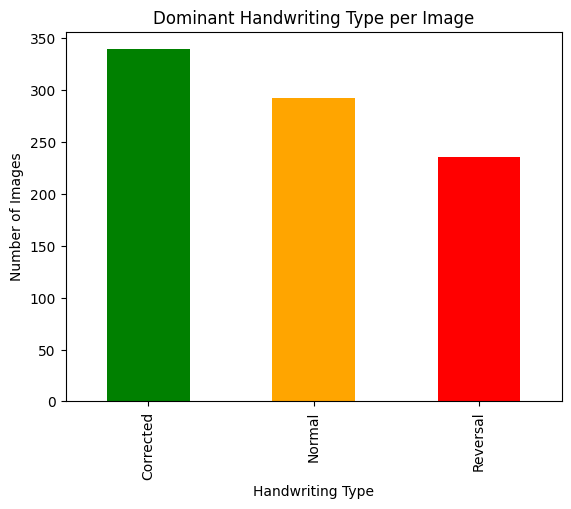

In [ ]:
import matplotlib.pyplot as plt
df_majority["class"].value_counts().plot(kind="bar", color=["green","orange","red"])
plt.title("Dominant Handwriting Type per Image")
plt.xlabel("Handwriting Type")
plt.ylabel("Number of Images")
plt.show()

In [ ]:
df_majority["normal_ratio"] = df_majority["normal"] / df_majority["total_letters"]
df_majority["reversal_ratio"] = df_majority["reversal"] / df_majority["total_letters"]
df_majority["corrected_ratio"] = df_majority["corrected"] / df_majority["total_letters"]

df_majority[["normal_ratio","reversal_ratio","corrected_ratio"]].head()

,normal_ratio,reversal_ratio,corrected_ratio
0,0.312500,0.359375,0.328125
1,0.353846,0.323077,0.323077
2,0.350877,0.315789,0.333333
3,0.357143,0.314286,0.328571
4,0.333333,0.348485,0.318182


In [ ]:
df_majority.groupby("class")[["normal_ratio","reversal_ratio","corrected_ratio"]].mean()

,normal_ratio,reversal_ratio,corrected_ratio
class,,,
Corrected,0.324901,0.323838,0.351261
Normal,0.347473,0.321779,0.330748
Reversal,0.326479,0.343939,0.329582


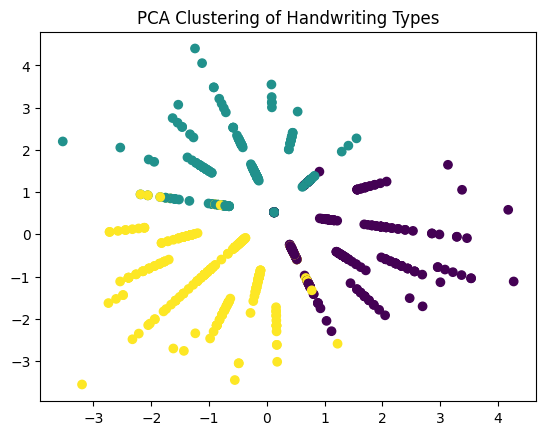

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

features = df_majority[["normal_ratio","reversal_ratio","corrected_ratio"]]
scaled = StandardScaler().fit_transform(features)
pca = PCA(n_components=2).fit_transform(scaled)
plt.scatter(pca[:,0], pca[:,1], c=df_majority["majority_class"], cmap="viridis")
plt.title("PCA Clustering of Handwriting Types")
plt.show()

In [ ]:
df_majority[["image", "class"]].to_csv("image_level_labels.csv", index=False)

In [ ]:
print(pd.read_csv("image_level_labels.csv"))

        image      class
0    val_0510   Reversal
1    val_0013     Normal
2    val_0452     Normal
3    val_0404     Normal
4    val_0400   Reversal
..        ...        ...
861  val_0340     Normal
862  val_0427     Normal
863  val_0336     Normal
864  val_0267  Corrected
865  val_0463     Normal

[866 rows x 2 columns]


In [ ]:
df_majority["image"] = df_majority["image"].apply(lambda x: x + ".jpg" if not x.endswith(".jpg") else x)
df_majority[["image", "class"]].to_csv("image_level_labels.csv", index=False)
print(pd.read_csv("image_level_labels.csv").head())

          image     class
0  val_0510.jpg  Reversal
1  val_0013.jpg    Normal
2  val_0452.jpg    Normal
3  val_0404.jpg    Normal
4  val_0400.jpg  Reversal


In [ ]:
'''import os, shutil
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
df_labels = pd.read_csv("image_level_labels.csv")
base_dir = Path("/content/handwriting_classification")
train_dir = base_dir / "train"
val_dir = base_dir / "val"
src_images = Path("runs/detect/predict")
for split_dir in [train_dir, val_dir]:
    for cls in df_labels["class"].unique():
        os.makedirs(split_dir / cls, exist_ok=True)
train_df, val_df = train_test_split(df_labels, test_size=0.2, stratify=df_labels["class"], random_state=42)
def copy_images(df, split_dir):
    for _, row in df.iterrows():
        src = src_images / row["image"]
        dst = split_dir / row["class"] / row["image"]
        if src.exists():
            shutil.copy(src, dst)
        else:
            print(" Missing:", src)

copy_images(train_df, train_dir)
copy_images(val_df, val_dir)

print("CNN dataset preparedsuccessfully.")'''

CNN dataset preparedsuccessfully.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision import models
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])
train_ds = datasets.ImageFolder("/content/handwriting_classification/train", transform=transform)
val_ds = datasets.ImageFolder("/content/handwriting_classification/val", transform=transform)

train_dl = torch.utils.data.DataLoader(train_ds, batch_size=16, shuffle=True)
val_dl = torch.utils.data.DataLoader(val_ds, batch_size=16)
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 3)  # 3 classes
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 200MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Epoch 1: Train Loss = 0.0323, Val Loss = 1.1230
Epoch 2: Train Loss = 0.0446, Val Loss = 0.9918
Epoch 3: Train Loss = 0.0492, Val Loss = 0.8826
Epoch 4: Train Loss = 0.0194, Val Loss = 0.8140
Epoch 5: Train Loss = 0.0194, Val Loss = 0.9312


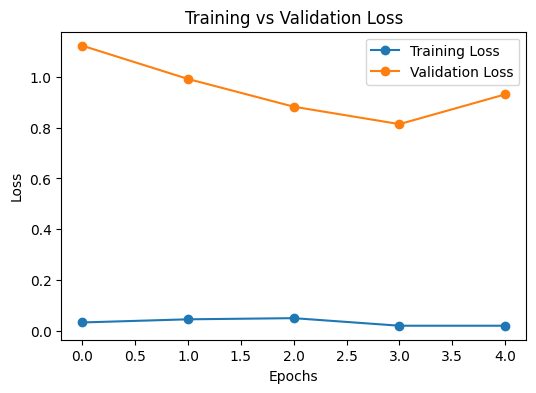

In [ ]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=16, shuffle=False)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

train_losses = []
val_losses = []

for epoch in range(5):
    model.train()
    running_train_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()

    train_loss = running_train_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
    val_loss = running_val_loss / len(val_loader)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")

plt.figure(figsize=(6,4))
plt.plot(train_losses, label='Training Loss', marker='o')
plt.plot(val_losses, label='Validation Loss', marker='o')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for imgs, labels in val_dl:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        preds = torch.argmax(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

print(classification_report(y_true, y_pred, target_names=train_ds.classes))

              precision    recall  f1-score   support

   Corrected       0.74      0.76      0.75        68
      Normal       0.85      0.75      0.79        59
    Reversal       0.73      0.81      0.77        47

    accuracy                           0.77       174
   macro avg       0.77      0.77      0.77       174
weighted avg       0.77      0.77      0.77       174



In [ ]:
torch.save(model.state_dict(), "cnn_best_epoch5.pt")
print("Saved cnn_best_epoch5.pt")

Saved cnn_best_epoch5.pt


              precision    recall  f1-score   support

   Corrected       0.74      0.76      0.75        68
      Normal       0.85      0.75      0.79        59
    Reversal       0.73      0.81      0.77        47

    accuracy                           0.77       174
   macro avg       0.77      0.77      0.77       174
weighted avg       0.77      0.77      0.77       174



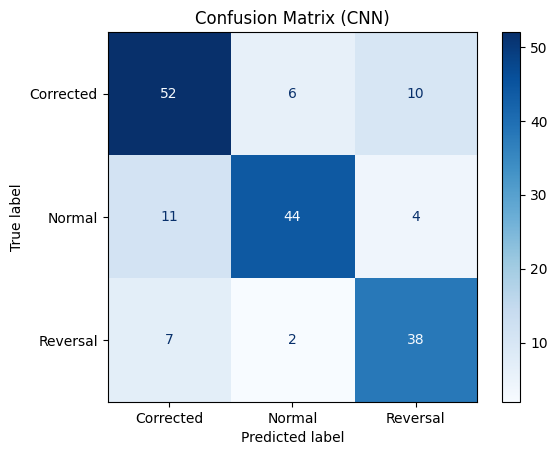

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import torch
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for imgs, labels in val_dl:
        imgs, labels = imgs.to(device), labels.to(device)
        outs = model(imgs)
        preds = outs.argmax(1).cpu().numpy()
        y_pred.extend(preds)
        y_true.extend(labels.cpu().numpy())

print(classification_report(y_true, y_pred, target_names=train_ds.classes))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_ds.classes)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (CNN)")
plt.show()

In [ ]:
list(cnn_preds.keys())[:5]

['val_0008.jpg',
 'val_0052.jpg',
 'val_0075.jpg',
 'val_0119.jpg',
 'val_0121.jpg']

In [ ]:
labels_df['image'].head()

,image
0,val_0510.jpg
1,val_0013.jpg
2,val_0452.jpg
3,val_0404.jpg
4,val_0400.jpg


In [ ]:
'''unmatched = labels_df[~labels_df['image'].isin(cnn_preds.keys())]['image'].head(10)
print(unmatched.tolist())'''

['val_0510.jpg', 'val_0452.jpg', 'val_0404.jpg', 'val_0400.jpg', 'val_0413.jpg', 'val_0250.jpg', 'val_0150.jpg', 'val_0362.jpg', 'val_0615.jpg', 'val_0533.jpg']


In [ ]:
!ls /content/dataset/kaggle/working/yolo_training/run1/weights/

best.pt  last.pt


In [ ]:
from ultralytics import YOLO
model = YOLO("/content/dataset/kaggle/working/yolo_training/run1/weights/best.pt")

print("Model loaded successfully!")

Model loaded successfully!


In [ ]:
!ls /content/handwriting_classification/val

Corrected  Normal  Reversal


In [ ]:
import os, shutil
from pathlib import Path

src_root = Path("/content/handwriting_classification/val")
flat_dir = Path("/content/handwriting_classification/val_flat")
flat_dir.mkdir(exist_ok=True)

for subdir in ["Normal", "Reversal", "Corrected"]:
    src_path = src_root / subdir
    for file in src_path.glob("*.jpg"):
        shutil.copy(file, flat_dir / file.name)

print("Flattened validation folder created at:", flat_dir)
!ls /content/handwriting_classification/val_flat | head

Flattened validation folder created at: /content/handwriting_classification/val_flat
val_0004.jpg
val_0006.jpg
val_0008.jpg
val_0013.jpg
val_0014.jpg
val_0017.jpg
val_0021.jpg
val_0028.jpg
val_0032.jpg
val_0033.jpg


In [ ]:
model.predict(
    source="/content/handwriting_classification/val_flat",
    conf=0.05,
    save=True,
    save_txt=True,
    imgsz=640,
    name="predict_cnnval"
)


image 1/174 /content/handwriting_classification/val_flat/val_0004.jpg: 640x640 29 object_As, 62 object_Bs, 16 object_Cs, 10.4ms
image 2/174 /content/handwriting_classification/val_flat/val_0006.jpg: 640x640 28 object_As, 65 object_Bs, 9 object_Cs, 9.6ms
image 3/174 /content/handwriting_classification/val_flat/val_0008.jpg: 640x640 21 object_As, 66 object_Bs, 16 object_Cs, 7.3ms
image 4/174 /content/handwriting_classification/val_flat/val_0013.jpg: 640x640 22 object_As, 70 object_Bs, 14 object_Cs, 7.5ms
image 5/174 /content/handwriting_classification/val_flat/val_0014.jpg: 640x640 29 object_As, 72 object_Bs, 16 object_Cs, 7.3ms
image 6/174 /content/handwriting_classification/val_flat/val_0017.jpg: 640x640 28 object_As, 61 object_Bs, 16 object_Cs, 7.3ms
image 7/174 /content/handwriting_classification/val_flat/val_0021.jpg: 640x640 26 object_As, 56 object_Bs, 14 object_Cs, 7.3ms
image 8/174 /content/handwriting_classification/val_flat/val_0028.jpg: 640x640 31 object_As, 79 object_Bs, 19 

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'object_A', 1: 'object_B', 2: 'object_C'}
 obb: None
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0

In [ ]:
import os
import pandas as pd
from pathlib import Path
from collections import Counter
LABEL_PATH = Path("/content/runs/detect/predict_cnnval/labels")

records = []
for label_file in LABEL_PATH.glob("*.txt"):
    image_name = label_file.stem + ".jpg"
    with open(label_file, "r") as f:
        lines = f.readlines()
        classes = [int(line.split()[0]) for line in lines]
        total = len(classes)
        if total == 0:
            continue
        count = Counter(classes)
        rec = {
            "image": image_name,
            "total": total,
            "normal": count.get(0, 0),
            "reversal": count.get(1, 0),
            "corrected": count.get(2, 0),
        }
        rec["class"] = max(["normal", "reversal", "corrected"], key=lambda k: rec[k])
        records.append(rec)

df_yolo = pd.DataFrame(records)
df_yolo.to_csv("yolo_val_labels.csv", index=False)
print(" YOLO labels saved:", df_yolo.shape)
df_yolo.head()

 YOLO labels saved: (866, 6)


,image,total,normal,reversal,corrected,class
0,val_0510.jpg,64,20,23,21,reversal
1,val_0013.jpg,65,23,21,21,normal
2,val_0452.jpg,57,20,18,19,normal
3,val_0404.jpg,70,25,22,23,normal
4,val_0400.jpg,66,22,23,21,reversal


In [ ]:
print("YOLO unique classes:", df_yolo["class"].unique())
print("CNN unique preds:", df_merge["cnn_pred"].unique())

YOLO unique classes: ['reversal' 'normal' 'corrected']
CNN unique preds: ['Normal' 'Corrected' 'Reversal']


In [ ]:
df_merge["class"] = df_merge["class"].str.lower().str.strip()
df_merge["cnn_pred"] = df_merge["cnn_pred"].str.lower().str.strip()
df_merge["agree"] = df_merge["class"] == df_merge["cnn_pred"]

print("Corrected agreement rate:", df_merge["agree"].mean())

✅ Corrected agreement rate: 0.7241379310344828


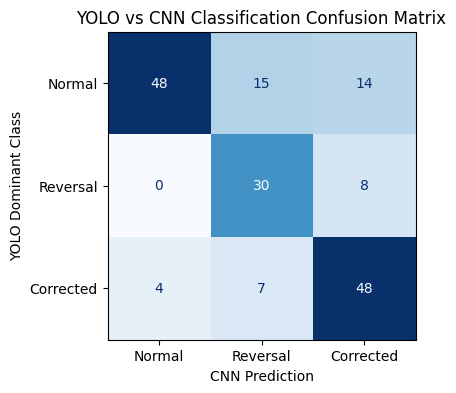

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
df_merge["class"] = df_merge["class"].str.lower().str.strip()
df_merge["cnn_pred"] = df_merge["cnn_pred"].str.lower().str.strip()
cm = confusion_matrix(df_merge["class"], df_merge["cnn_pred"], labels=["normal","reversal","corrected"])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal","Reversal","Corrected"])
fig, ax = plt.subplots(figsize=(5,4))
disp.plot(cmap="Blues", ax=ax, colorbar=False)
plt.title("YOLO vs CNN Classification Confusion Matrix")
plt.xlabel("CNN Prediction")
plt.ylabel("YOLO Dominant Class")
plt.show()

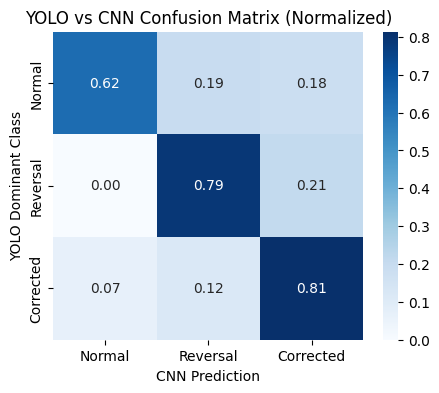

In [ ]:
import seaborn as sns
import numpy as np

cm_norm = cm.astype("float") / cm.sum(axis=1, keepdims=True)
plt.figure(figsize=(5,4))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=["Normal","Reversal","Corrected"],
            yticklabels=["Normal","Reversal","Corrected"])
plt.title("YOLO vs CNN Confusion Matrix (Normalized)")
plt.xlabel("CNN Prediction")
plt.ylabel("YOLO Dominant Class")
plt.show()

In [ ]:
import os

for root, dirs, files in os.walk("/content/handwriting_classification"):
    if files:
        print(root)
        break

/content/handwriting_classification/train/Corrected


In [ ]:
import torch
import torch.nn as nn
from torchvision import models
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 3)
state_dict = torch.load("/content/cnn_best_epoch5.pt", map_location='cpu')
model.load_state_dict(state_dict)

model.eval()
print("CNN model reloaded successfully (ResNet18).")

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


CNN model reloaded successfully (ResNet18).


In [ ]:
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Conv2d):
        last_conv = name
print("Last convolutional layer:", last_conv)

Last convolutional layer: layer4.1.conv2


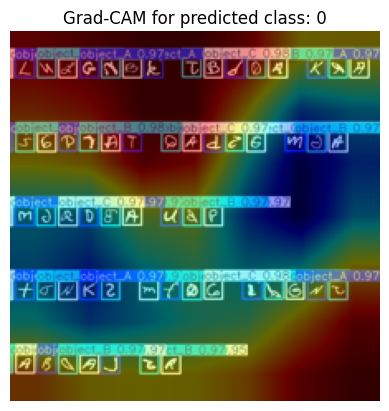

In [ ]:
import cv2
from torchvision import transforms
from PIL import Image
img_path = "/content/handwriting_classification/train/Corrected/val_0566.jpg"
img = Image.open(img_path).convert("RGB")
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])
input_tensor = transform(img).unsqueeze(0)
gradients = []
activations = []

def save_activation(module, input, output):
    activations.append(output.cpu().detach())

def save_gradient(module, grad_input, grad_output):
    gradients.append(grad_output[0].cpu().detach())

target_layer = model.layer4[-1]
target_layer.register_forward_hook(save_activation)
target_layer.register_backward_hook(save_gradient)

output = model(input_tensor)
pred_class = torch.argmax(output, dim=1).item()
model.zero_grad()
output[0, pred_class].backward()
grads = gradients[0].mean(dim=[2,3], keepdim=True)
cams = (activations[0] * grads).sum(dim=1).squeeze()
cam = np.maximum(cams.numpy(), 0)
cam = cv2.resize(cam, (224, 224))
cam = cam / cam.max()
heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
img_np = np.array(img.resize((224, 224)))
overlay = np.uint8(0.4 * heatmap + 0.6 * img_np)

plt.imshow(overlay)
plt.title(f"Grad-CAM for predicted class: {pred_class}")
plt.axis('off')
plt.show()

In [ ]:
classes = ["Normal", "Reversal", "Corrected"]
paths = [
    "/content/handwriting_classification/train/Normal/val_XXXX.jpg",
    "/content/handwriting_classification/train/Reversal/val_YYYY.jpg",
    "/content/handwriting_classification/train/Corrected/val_ZZZZ.jpg"
]

In [ ]:
import os
import random
base_path = "/content/handwriting_classification/train"
classes = ["Normal", "Reversal", "Corrected"]

class_images = {}
for cls in classes:
    cls_folder = os.path.join(base_path, cls)
    all_imgs = [f for f in os.listdir(cls_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    chosen_img = random.choice(all_imgs)
    class_images[cls] = os.path.join(cls_folder, chosen_img)

print("Randomly selected images for Grad-CAM:")
for k, v in class_images.items():
    print(f"{k}: {v}")

✅ Randomly selected images for Grad-CAM:
Normal: /content/handwriting_classification/train/Normal/val_0568.jpg
Reversal: /content/handwriting_classification/train/Reversal/val_0228.jpg
Corrected: /content/handwriting_classification/train/Corrected/val_0377.jpg


✅ Saved Grad-CAM for Normal → /content/GradCAM_Normal.jpg
✅ Saved Grad-CAM for Reversal → /content/GradCAM_Reversal.jpg
✅ Saved Grad-CAM for Corrected → /content/GradCAM_Corrected.jpg


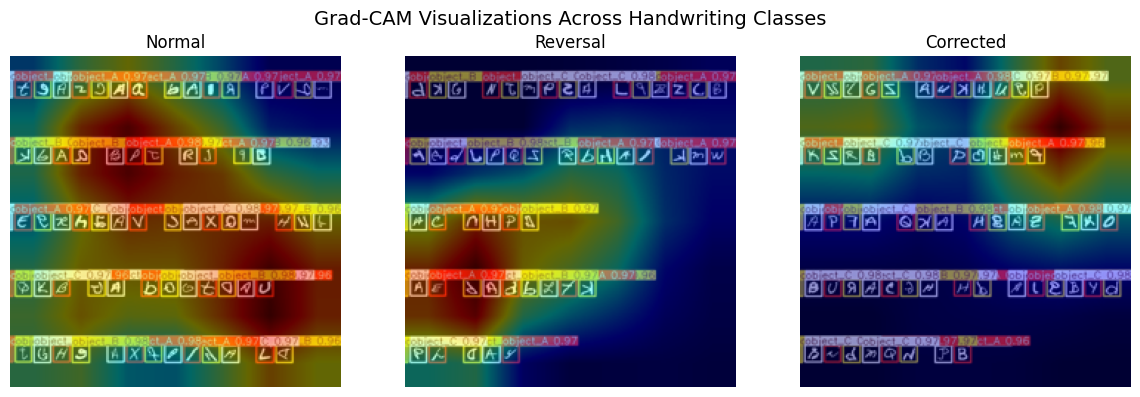

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])
class_images = {
    "Normal": "/content/handwriting_classification/train/Normal/val_0568.jpg",
    "Reversal": "/content/handwriting_classification/train/Reversal/val_0228.jpg",
    "Corrected": "/content/handwriting_classification/train/Corrected/val_0377.jpg"
}
def gradcam_for_image(img_path, class_name):
    img = Image.open(img_path).convert("RGB")
    input_tensor = transform(img).unsqueeze(0)
    activations, gradients = [], []

    def forward_hook(module, input, output):
        activations.append(output.cpu().detach())

    def backward_hook(module, grad_input, grad_output):
        gradients.append(grad_output[0].cpu().detach())
    target_layer = model.layer4[-1]
    handle_fwd = target_layer.register_forward_hook(forward_hook)
    handle_bwd = target_layer.register_backward_hook(backward_hook)

    output = model(input_tensor)
    pred_class = torch.argmax(output, dim=1).item()
    model.zero_grad()
    output[0, pred_class].backward()

    grads = gradients[0].mean(dim=[2,3], keepdim=True)
    cams = (activations[0] * grads).sum(dim=1).squeeze()
    cam = np.maximum(cams.numpy(), 0)
    cam = cv2.resize(cam, (224, 224))
    cam = cam / cam.max()

    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    img_np = np.array(img.resize((224, 224)))
    overlay = np.uint8(0.4 * heatmap + 0.6 * img_np)

    save_path = f"/content/GradCAM_{class_name}.jpg"
    cv2.imwrite(save_path, overlay)
    print(f" Saved Grad-CAM for {class_name} → {save_path}")

    handle_fwd.remove()
    handle_bwd.remove()

    return overlay

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, (cls, path) in enumerate(class_images.items()):
    heatmap_img = gradcam_for_image(path, cls)
    axes[i].imshow(cv2.cvtColor(heatmap_img, cv2.COLOR_BGR2RGB))
    axes[i].set_title(cls)
    axes[i].axis("off")

plt.suptitle("Grad-CAM Visualizations Across Handwriting Classes", fontsize=14)
plt.tight_layout()
plt.show()